In [ ]:
!pip install pytrends
import seaborn as sns
import matplotlib.pyplot as plt
import pytrends
from pytrends.request import TrendReq
import pandas as pd

In [ ]:
# Limit 5
kw_list = ['machine learning','data science','cloud computing','artificial intelligence']

In [ ]:
pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', gprop='')

In [ ]:
pytrends.interest_over_time()

,machine learning,data science,cloud computing,artificial intelligence,isPartial
date,,,,,
2017-04-23,56,34,28,36,False
2017-04-30,56,35,25,36,False
2017-05-07,58,35,27,38,False
2017-05-14,61,35,36,37,False
2017-05-21,61,35,33,36,False
...,...,...,...,...,...
2022-03-20,77,70,36,46,False
2022-03-27,76,70,34,48,False
2022-04-03,84,74,35,49,False


In [ ]:
pytrends.get_historical_interest(kw_list,year_start=2022, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=4, day_end=23, hour_end=0)

,machine learning,data science,cloud computing,artificial intelligence,isPartial
date,,,,,
2022-01-01 00:00:00,18,25,0,11,False
2022-01-01 01:00:00,15,30,3,25,False
2022-01-01 02:00:00,0,27,6,6,False
2022-01-01 03:00:00,38,10,13,27,False
2022-01-01 04:00:00,44,25,31,17,False
...,...,...,...,...,...
2022-04-22 21:00:00,39,33,10,18,False
2022-04-22 22:00:00,32,31,12,16,False
2022-04-22 23:00:00,36,32,12,17,False


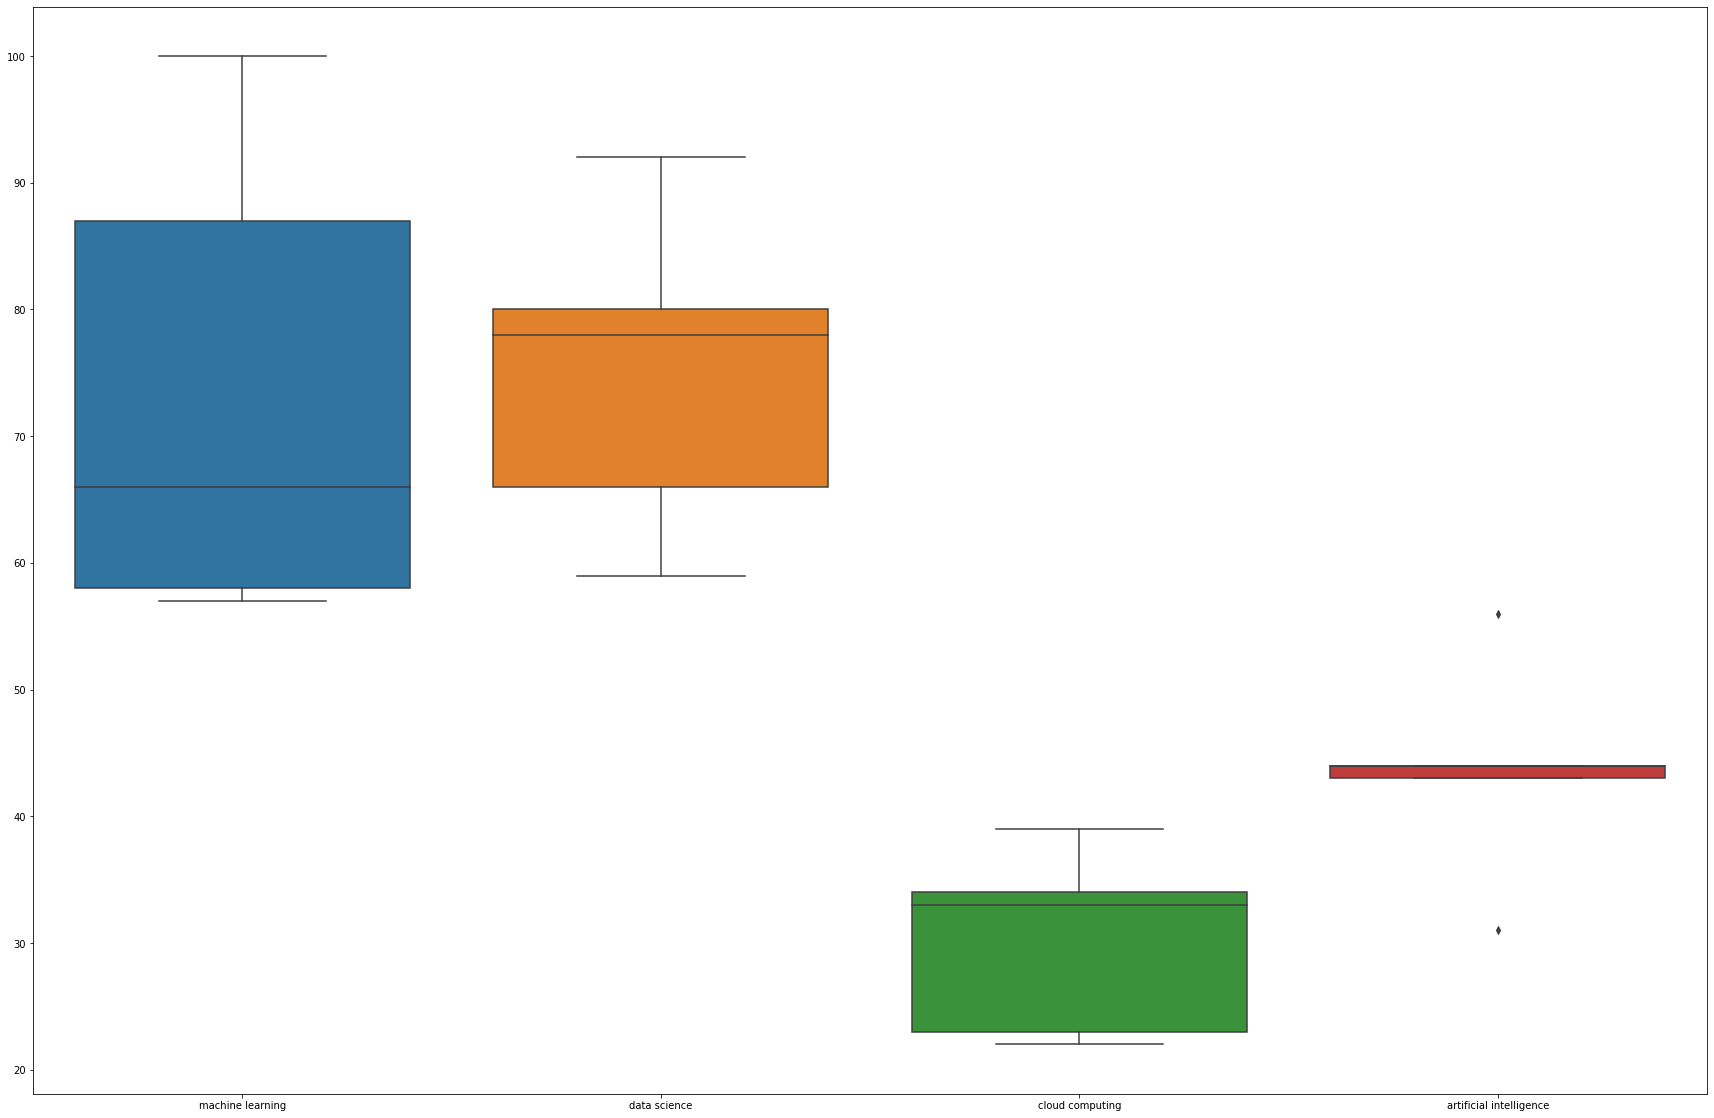

In [ ]:
df = pytrends.interest_over_time().iloc[:,:-1]
plt.figure(figsize=(30,20))
sns.boxplot(data = df)

In [ ]:
pytrends.related_topics()

{}

In [ ]:
pytrends.related_queries()['machine learning']['rising']['value'].describe()

count     18.000000
mean     274.444444
std      241.520240
min       40.000000
25%       75.000000
50%      150.000000
75%      500.000000
max      750.000000
Name: value, dtype: float64

In [ ]:
pytrends.related_queries()['machine learning']['rising'].shape
pytrends.related_queries()['data science']['rising'].shape

(14, 2)

In [ ]:
first_lvl = pd.DataFrame()
for k in kw_list:
  for tipe in ['top','rising']:
    first_lvl = pd.concat([first_lvl,pytrends.related_queries()[k][tipe]])

In [ ]:
first_lvl

,query,value
0,what is machine learning,100
1,python machine learning,80
2,deep learning,79
3,ai machine learning,66
4,ai,66
...,...,...
16,who is the father of artificial intelligence,3
0,artificial intelligence adalah,300
1,a.i. artificial intelligence,250
2,who is the father of artificial intelligence,200


In [ ]:
first_lvl['query'].value_counts()

who is the father of artificial intelligence    2
aws                                             2
free data science course                        2
data science bootcamp                           2
machine learning                                2
                                               ..
mlp machine learning                            1
dimensionality reduction in machine learning    1
data preprocessing in machine learning          1
citation machine                                1
learn data science                              1
Name: query, Length: 114, dtype: int64

In [ ]:
pytrends.related_queries()['machine learning']['top']

,query,value
0,what is machine learning,100
1,python machine learning,80
2,deep learning,79
3,ai machine learning,66
4,ai,66
5,artificial intelligence,43
6,data science,42
7,machine learning engineer,38
8,machine learning models,34
9,machine learning course,33


In [ ]:
pytrends.related_queries()['data science']['top']

,query,value
0,data science course,100
1,what is data science,89
2,data science salary,66
3,data science jobs,65
4,data analytics,48
5,data scientist,45
6,data science courses,40
7,data science degree,39
8,machine learning,34
9,data science certificate,28


In [ ]:
pytrends.related_queries()['data science']['rising']

,query,value
0,quartz countertops,8550
1,types of big data,950
2,actuary vs data science,350
3,what do you call the tool that can be used to ...,300
4,data science คือ,120
5,ucsd data science,100
6,data science with python course,90
7,ibm data science professional certificate,60
8,data analyst salary,50
9,why data science is important,50


In [ ]:
pytrends.related_queries()['data science']['rising']['value'].describe()

count      14.000000
mean      771.428571
std      2252.099387
min        40.000000
25%        50.000000
50%        75.000000
75%       255.000000
max      8550.000000
Name: value, dtype: float64

In [ ]:
import pandas as pd

pd.DataFrame(pytrends.suggestions('emerging tech')).head(20)

,mid,title,type
0,/m/0b59ky,Emerging technologies,Topic
1,/m/02pl54c,Innovative Food Science and Emerging Technologies,Peer-reviewed journal
2,/g/11dybccc3x,Soonish: Ten Emerging Technologies That'll Imp...,Book by Kelly Weinersmith and Zach Weinersmith
3,/m/02q1cqj,Baddi University of Emerging Sci. & Tech.,"University in Baddi, India"
4,/m/0cr3_t9,NCR-CET College,"College in Karachi, Pakistan"


In [ ]:
pd.DataFrame(pytrends.suggestions('machine learning'))

,mid,title,type
0,/m/01hyh_,Machine learning,Field of study
1,/g/11f2sl5v8_,Automated machine learning,Topic
2,/m/012nf7j0,Adversarial machine learning,Topic
3,/m/0f138r,Journal of Machine Learning Research,Peer-reviewed journal
4,/m/04q9r7w,Online machine learning,Topic
